## Wine Quality by UCI
## Качество вина от UCI

"https://www.kaggle.com/huseyinelci/wne-qualty-by-uci?select=WineQuality-WhiteWine.csv"

Два разных набора данных относятся к вариантам красного и белого вина португальского вина "Винью Верде". Для получения более подробной информации обратитесь к ссылке [Пауло Кортез, А. Сердейра, Ф. Алмейда, Т. Матос и Дж. Рейс, 2009]. Из-за проблем с конфиденциальностью и логистики доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т.д.)

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих).

#### Number of Instances:
#### Количество экземпляров:

 - Красное вино: 1599
 - Белое вино: 4898
 
#### Number of Attributes:
#### Количество признаков:

Входные переменные (на основе физико-химических тестов):

1. fixed acidity (фиксированная кислотность)
2. volatile acidity (летучая кислотность)
3. citric acid (лимонная кислота)
4. residual sugar (остаточный сахар)
5. chlorides (хлориды)
6. free sulfur dioxide (свободный диоксид серы)
7. total sulfur dioxide (общий диоксид серы)
8. density (плотность)
9. pH (мера кислотность)
10. sulphates (сульфаты)
11. alcohol (спирт)

Выходная переменная (на основе сенсорных данных):

12. quality (качество): score between 0 and 10

#### Описание признаков

Названия признаков                          | Описания признаков          
--------------------------------------------|--------------------------------------------------------
fixed acidity (фиксированная кислотность)   |Этот столбец содержит большинство кислот, связанных с вином, фиксированных или нелетучих
volatile acidity (летучая кислотность)      |Слишком высокое количество уксусной кислоты в вине в этой колонке может привести к неприятным последствиям. Это значит, что вино обладает сильным уксусным вкусом.
citric acid (лимонная кислота)              |В небольших количествах лимонная кислота может добавить винам «свежесть» и «аромат».
residual sugar (остаточный сахар)           |Количество сахара, оставшегося после прекращения брожения. Редко можно найти вина с концентрацией менее 1 грамма/литр. Вина с концентрацией более 45 г/л считаются сладкими.
chlorides (хлориды)                         |В этом столбце указано количество соли в вине.
free sulfur dioxide (свободный диоксид серы)|Свободная форма $SO_2$ находится в равновесии между молекулярным $SO_2$ (в виде растворенного газа) и бисульфит-ионом.
total sulfur dioxide (общий диоксид серы)   |Количество свободных и связанных форм $S0_2$. Это количество при низких концентрациях $SO_2$ в основном не обнаруживается в вине, но при концентрациях свободного $SO_2$ более 50 частей на миллион $SO_2$ проявляется в аромате запаха и вкусе вина.
density (плотность)                         |В этом столбце указана плотность. Плотность вина близка к плотности воды в зависимости от процента содержания сахара и алкоголя.
pH (мера кислотность)                       |В этом столбце указано количество кислоты или основного вина. Описывает кислотность или основность вина по шкале от 0 (очень кислая) до 14 (очень щелочная). Большинство вин имеют уровень pH от 3 до 4.
sulphates (сульфаты)                        |В этом столбце указано количество сульфатов, содержащихся в вине. Добавка для вина, которая может способствовать повышению уровня газообразного диоксида серы ($S0_2$), который действует как антимикробное и антиоксидантное средство.
alcohol (спирт)                             |В этом столбце указано процентное содержание алкоголя в вине.
quality (качество)                          |В этой колонке указано качество вина.


#### Описание задачи
Нам нужно оценить качество вина по шкале от 0 до 10 по входным признакам (физико-химические признаки и тип вина).


## Загружаем библиотеки

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn  

## Загружаем данные

In [2]:
data_raw_red = pd.read_csv("WineQualityRedWine.csv")
data_raw_white = pd.read_csv("WineQualityWhiteWine.csv")

Nr,dr=data_raw_red.shape    
Nw,dw=data_raw_white.shape
Nr,Nw

(1599, 4898)

In [3]:
data_raw_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data_raw_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Объединяем наши данные в одну таблицу

#### Добавим тип вина к нашим данным
Добавим столбец о типе вина к нашим данным.
Объединим данные о красном вине и о белом, чтобы получить категориальный признак в нашей таблице.
(У нас будут разнородные признаки).

In [5]:
clmn = np.full(Nr, 'red')
data_raw_red['Type']=clmn
data_raw_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [6]:
clmn = np.full(Nw, 'white')
data_raw_white['Type']=clmn
data_raw_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Объединим данные в одну таблицу

In [7]:
data_raw = pd.concat((data_raw_red, data_raw_white), axis=0)
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
data_raw = data_raw.reset_index(drop=True) # перенумеруем наши объекты
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
data_raw['Type'].dtype

dtype('O')

Изменим тип с object на категориальный

In [10]:
data_raw['Type'] = data_raw['Type'].astype('category')

In [11]:
data_raw['Type'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False)

In [12]:
#data_raw['quality'] = data_raw['quality'].astype('category')

In [13]:
data_raw['quality'].dtype

dtype('int64')

# Предобработка данных

## Визуализируем данные

### Зависимость качества от одного признака 
Визуализация данных нужна, чтобы как-то понять эти данные, увидеть какие-то закономерности, связи между объектами

#### Зависимость качества от фиксированной кислотности:

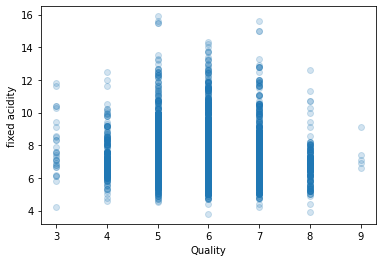

In [14]:
plt.scatter(data_raw['quality'], data_raw['fixed acidity'], alpha=0.2, )
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
pass

Можем заметить, что хорошее вино имеет кислотность ниже средней (6-8), вино среднего качества имеет любую кислотность.

#### Зависимость качества от плотность

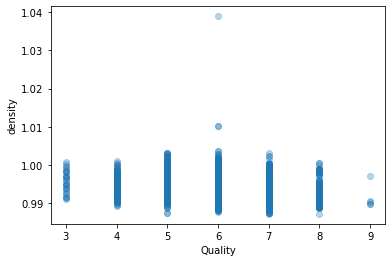

In [15]:
plt.scatter(data_raw['quality'], data_raw['density'], alpha=0.3)
plt.xlabel('Quality')
plt.ylabel('density')
pass

Заметим, что  в среднем вино имеет одинаковую плотность.
Можем увидеть одно значение, отличающееся от остальных. Возможно, это выброс. 

### Удаление выбросов

In [16]:
data_raw['fixed acidity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.948
0.010     5.100
0.050     5.700
0.100     6.000
0.500     7.000
0.900     8.800
0.950     9.800
0.990    12.000
0.995    12.700
Name: fixed acidity, dtype: float64

In [17]:
data_raw['density'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.988620
0.010    0.988920
0.050    0.989900
0.100    0.990670
0.500    0.994890
0.900    0.998400
0.950    0.999392
0.990    1.000600
0.995    1.001400
Name: density, dtype: float64

In [18]:
data = data_raw[
    (data_raw['fixed acidity'] >= data_raw['fixed acidity'].quantile(0.005)) & (data_raw['fixed acidity'] <= data_raw['fixed acidity'].quantile(0.995)) &
    (data_raw['density']  >= data_raw['density' ].quantile(0.005)) & (data_raw['density']  <= data_raw['density' ].quantile(0.995)) ]
data.shape
data=data_raw

Посмотрим, как изменилась зависимость:

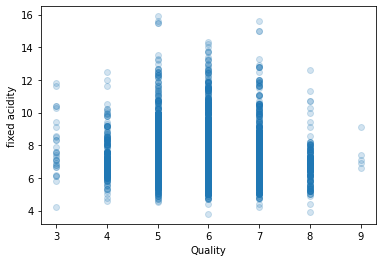

In [19]:
plt.scatter(data['quality'], data['fixed acidity'], alpha=0.2)
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
pass

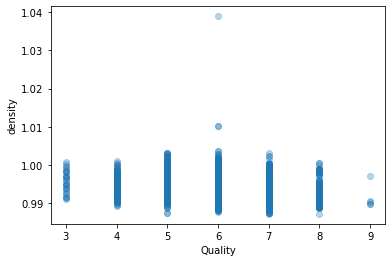

In [20]:
plt.scatter(data['quality'], data['density'], alpha=0.3)
plt.xlabel('Quality')
plt.ylabel('density')
pass

In [21]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [22]:
data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white
6489,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white
6490,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
6491,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
6492,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### Пропущенные значения

In [23]:
data.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
Type                    6497
dtype: int64

Пропущенных значений нет.

### Задача классификации

Значения качества в нашей таблице: 

In [24]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

В наших данных значения качества изменяются от 3 до 9, всего 7 классов.

## Визуализация и описательная статистика

Данные из себя представляют точки в 13 мерном пространстве. Выше рассматривали отдельные проекции, рассмотрим подробнее.

Данные о количественных признаках:

In [25]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Для каждого количественного признака приведены 
* количество элементов в соответствующем столбце 
* средние значения
* стандартное отклонение (std)
* минимальное и макимальное значения
* медиана (квантиль $50\%$)
* значения нижнего и верхнего квартилей (квантили $25\%$ и $75\%$)

Среднее значение качества в нашей выборке - 5.8, больше 3/4 объектов имеют данную характеристику.

По умолчанию этот метод дает информацию только о количественных признаках (не включая номинальные).
Получим информацию о категориальных (нужно явно указать):

In [26]:
data.describe(include=['category'])

,Type
count,6497
unique,2
top,white
freq,4898


Для категориальных признаков информация другая:
* количество элементов в соответствующем столбце
* количество значений, которые принимает данный признак
* наиболее популярное значение
* количество объектов с самым популярным значением

В нашей выборке больше белого вина.

Изобразим графически количество различных значений у номинальных признаков:

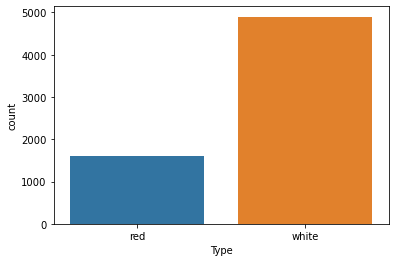

In [27]:
sns.countplot(x='Type', data=data)
pass

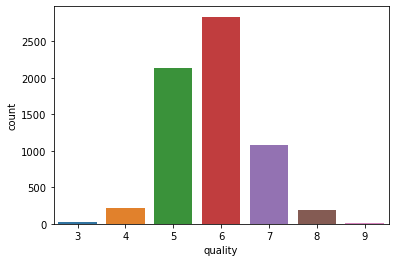

In [28]:
sns.countplot(x='quality', data=data)
pass

Большинство наших объектов среднего качества.

Построим все возможные диаграммы рассеивания для каждой пары переменных: (цвет отвечает за тип вина)

In [29]:
# sns.pairplot(data_raw.iloc[:], hue='Type', palette=['red', 'yellow'], diag_kind='hist')
# plt.legend()
# pass

Можно заметить, что красные вина могут иметь значения признаков больше, чем белые вина. 

На диагонали расположены столбцовые гистограммы распределения признаков. Гистограммы можно построить отдельно.

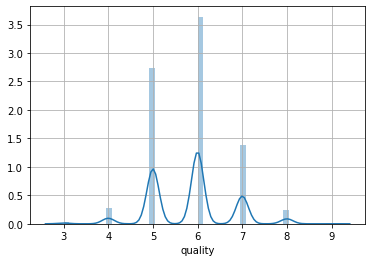

In [30]:
sns.distplot(data.loc[:,'quality'])
plt.grid()
pass

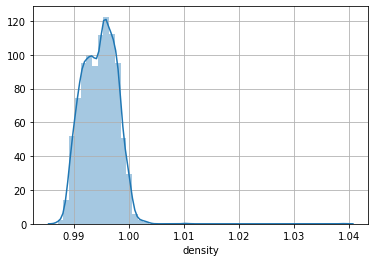

In [31]:
sns.distplot(data.loc[:,'density'])
plt.grid()
pass

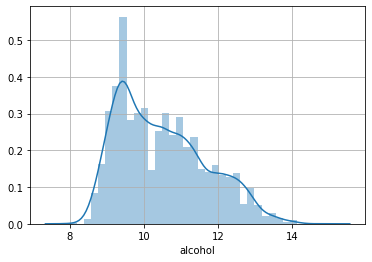

In [32]:
sns.distplot(data.loc[:,'alcohol'])
plt.grid()
pass 

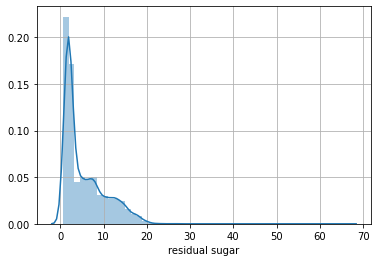

In [33]:
sns.distplot(data.loc[:,'residual sugar'])
plt.grid()
pass

Можно вычислить матрицу корреляции для количественных признаков.

Чем значение ближе к 1, тем корреляция между признаками больше. 

In [34]:
corr_mat = data.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

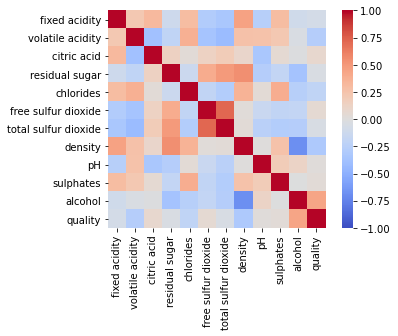

In [35]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Возможно из-за малого количества данных о качественном вине мы не можем получить большую информацию о зависимости качества вина от признаков

In [36]:
corr_mat > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,True,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


In [37]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.720934
residual sugar       density                 0.552517
dtype: float64

Видим зависимость некоторых входных признаков.

Свободный диоксид серы связан с полным, что объяснимо.

Также остаточный сахар взаимосвязан с плотностью вина.

Относительно большие значения этих коэффициентов объяснимы. 

## Бинаризация номинальных признаков

Некоторые алгоритмы из библиотеки scikit-learn не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых признаков.

Бинарный признак `'Type'` заменим на числовой. 

`'Red'` → 0, `'White'`→ 1 

Сделать это можно так:

In [38]:
data['Type'] = pd.factorize(data['Type'])[0]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


##  Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать (привести к одному масштабу).
Масштаб наших признаков не сильно отличается, но проведём нормализацию для улучшения работы алгоритма.

In [39]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,9.396824e-16,-2.652262e-14,4.807301e-14,-2.252111e-15,1.278966e-14,-6.367933e-17,-5.225926e-16,2.181060e-12,-3.317152e-14,-6.607989e-15,-2.235860e-14,-3.741030e-15,4.664543e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00,-3.227439e+00,-1.750055e+00
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01,-9.371575e-01,5.713226e-01
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01,2.079830e-01,5.713226e-01
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01,2.079830e-01,5.713226e-01
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00,3.643405e+00,5.713226e-01


## Разобьём данные на обучающую и тестовую выборки
Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [40]:
X = data_stand.drop(['quality'], axis=1)
y = data['quality']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4872, 1625)

## Обучаем классификатор ближайших соседей kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

## Проверяем качество классификатора

In [43]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [44]:
y_train.shape

(4872,)

In [45]:
y_test != y_test_pred

151      True
157     False
1325    False
1198     True
498      True
        ...  
5871    False
449      True
6257     True
3803    False
3926     True
Name: quality, Length: 1625, dtype: bool

Ошибка:

In [46]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.326559934318555, 0.4449230769230769)

### Confusion matrix

### Матрица рассогласования:

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[  0,   1,   5,   2,   0,   0,   0],
       [  0,   4,  27,  21,   2,   0,   0],
       [  0,   9, 343, 167,  15,   1,   0],
       [  0,   3, 185, 434,  82,   5,   0],
       [  0,   0,  20, 124, 115,  11,   0],
       [  0,   1,   0,  21,  20,   6,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

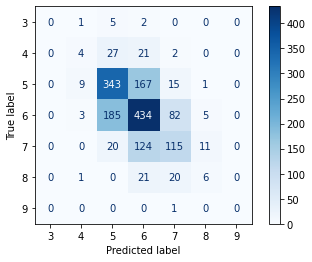

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

### Рассмотрим другие параметры классификатора

#### 7 соседей, евклидова метрика

In [49]:
model = KNeighborsClassifier(n_neighbors=7, p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.33148604269293924, 0.4461538461538462)

In [52]:
confusion_matrix(y_test, y_test_pred)

array([[  1,   1,   4,   2,   0,   0,   0],
       [  0,   5,  29,  18,   2,   0,   0],
       [  0,  12, 334, 171,  17,   1,   0],
       [  0,   6, 187, 431,  82,   3,   0],
       [  0,   0,  17, 124, 123,   6,   0],
       [  0,   0,   4,  18,  20,   6,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

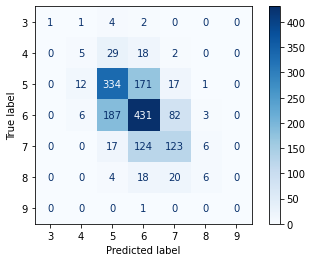

In [53]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

#### 1 сосед, манхеттоновское расстояние


In [54]:
model = KNeighborsClassifier(n_neighbors=1, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [55]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

При одном соседе на обучающей выборке мы точно получим ошибку 0:

In [56]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.3569230769230769)

Есть объект, его нужно проклассифицировать, метод ищет в обучающей выборке самый близкий объект. Т.к. объект был из обучающей выборки, то сам объект и будет самым близким соседом. Поэтому для него самого метка будет точно правильной.

In [57]:
confusion_matrix(y_test, y_test_pred)

array([[  0,   0,   4,   2,   2,   0,   0],
       [  2,  18,  13,  16,   5,   0,   0],
       [  1,  16, 361, 131,  24,   2,   0],
       [  0,  14, 123, 463,  94,  15,   0],
       [  0,   0,  15,  63, 181,  11,   0],
       [  0,   0,   3,  12,  11,  22,   0],
       [  0,   0,   0,   0,   0,   1,   0]], dtype=int64)

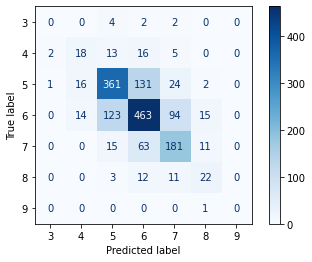

In [58]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

#### 12 соседей, манхеттоновское расстояние

In [59]:
model = KNeighborsClassifier(n_neighbors=12, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [61]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.37212643678160917, 0.44676923076923075)

In [62]:
confusion_matrix(y_test, y_test_pred)

array([[  0,   1,   5,   2,   0,   0,   0],
       [  0,   1,  29,  23,   1,   0,   0],
       [  0,   3, 346, 171,  15,   0,   0],
       [  0,   0, 181, 447,  78,   3,   0],
       [  0,   0,  16, 148, 104,   2,   0],
       [  0,   0,   1,  20,  26,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

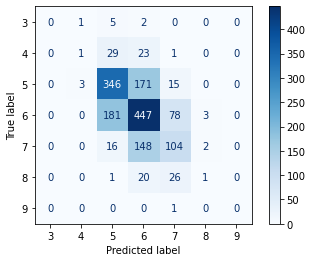

In [63]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

### Случайный лес 

In [64]:
from sklearn import ensemble # ансамбль
rf_model = ensemble.RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [66]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.31446153846153846)

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[  0,   0,   4,   4,   0,   0,   0],
       [  0,   9,  25,  19,   1,   0,   0],
       [  0,   2, 387, 142,   4,   0,   0],
       [  0,   2,  97, 548,  62,   0,   0],
       [  0,   0,   5, 112, 152,   1,   0],
       [  0,   0,   1,  13,  16,  18,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

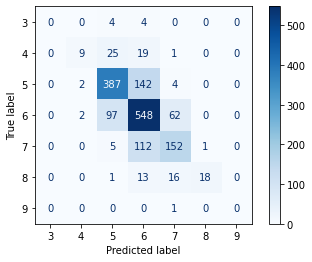

In [68]:
plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues)
pass

Минимальную ошибку получим при классификации с помощью Random Forest.

Но тем не менее, ошибка всё равно очень большая, 31%

У нас очень мало данных о вине плохого и очень хорошего качества, классы сильно несбалансированны. 
Лучше всего в данном случае искать данные об этих классах.

# ДЗ 4

На данных:

Матрица корреляции относительно качественного вина и относительно некачественного 

Борьба с несбалансированными классами




# Обучим на этих данных полносвязную (неглубокую) нейронную сеть

Полносвязная нейронная сеть = MLP - Multi Layer Perceptron


Попробуйте 1-2 скрытых слоя. 

Постройте графики зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha и от количества нейронов. 

Наблюдается ли переобучение/недообучение? 

По желанию: можете использовать torch и сверточные сети Сделайте выводы.

Импортируем классификатор

In [69]:
from sklearn.neural_network import MLPClassifier

Вызываем конструктор для одного слоя из 100 нейронов

По старой терминологии - трехслойная полносвязная нейронная сеть

In [70]:
mlp_model = MLPClassifier(hidden_layer_sizes = (30,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                           max_iter=1500)

In [71]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30,), max_iter=1500,
              random_state=42)

Проверяем ошибки

In [72]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках

In [73]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.3842364532019704 0.4430769230769231


Можно по-другому

In [74]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.6157635467980296 0.556923076923077


In [75]:
print(1 - mlp_model.score(X_test, y_test))

0.44307692307692303


Или так

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_train, y_train_pred)

0.6157635467980296

In [78]:
accuracy_score(y_test, y_test_pred)

0.556923076923077

## Подбор гиперпараметров
Можно подбирать и количество слоёв, и количество нейронов. 

Подберем оптимальное значение параметра регуляризации `alpha`

(Можно вместо циклов, написанных руками, использовать `sklearn.model_selection.GridSearchCV` и т.п.)

In [79]:
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (30,), 
                              solver = 'adam', activation = 'logistic', max_iter=1500, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

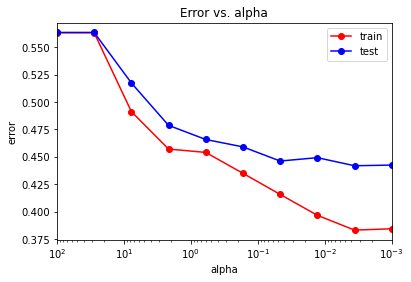

In [91]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

##### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

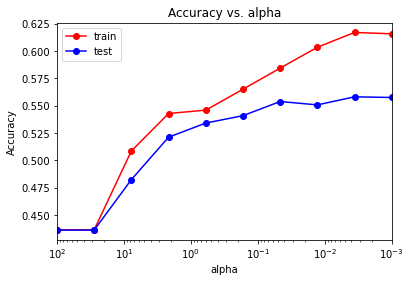

In [92]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

##### Минимальное значение ошибки:

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.3830049261083744 0.44184615384615383


Оптимальное значение `alpha`:

In [83]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00359381]


In [84]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном *оптимальном* значении `alpha`:

In [85]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (30,),
                          solver = 'adam', activation = 'logistic', random_state = 42, max_iter=1500)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.3830049261083744
0.44184615384615383


### Матрица рассогласования:

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[  0   0   0   0   0   0   0]
 [  0   4   4   1   0   0   0]
 [  3  35 326 152   6   1   0]
 [  5  15 200 477 164  25   1]
 [  0   0   5  79 100  22   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


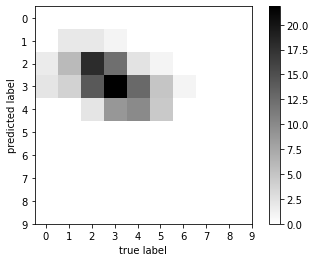

In [87]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

#### Кроме того, вы можете воспользоваться встроенной в Sklearn функцией, которая сама считает и отрисовывает Confusion matrix

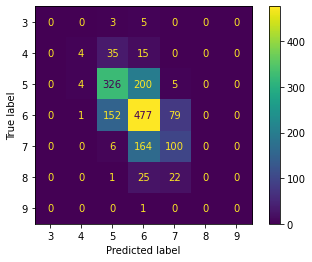

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 

### Другие метрики качества:

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.44      0.07      0.13        54
           5       0.62      0.61      0.62       535
           6       0.54      0.67      0.60       709
           7       0.49      0.37      0.42       270
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1625
   macro avg       0.30      0.25      0.25      1625
weighted avg       0.54      0.56      0.54      1625



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Из-за несбалансированности классов мы получаем очень большую ошибку. 

В качестве вариантов улучшения программы: 

- дублировать примеры из классов с малым количеством экземпляров и удаление примеров из классов с большим количеством экземпляров

- использовать различные веса в logloss функции